---
# **Universidad de San Carlos de Guatemala**  
## **Escuela de Ciencias Físicas y Matemáticas**    
**Laboratorio de reducción de datos**  
**Dulce María Mayorga Vásquez; 202306444**  
**Práctica 2 - Mediciones y análisis estadístico con el sensor HC-SR04**   
**28 de abril de 2025** 
---

# Practica 2

### Procedimiento:

3. Análisis estadístico
Con el archivo CSV generado:

- Calcula:
    - Media (μ)  
    - Desviación estándar (σ) 
    - Error absoluto medio (MAE) 
    - Error estándar de la media (SEM)
    - Intervalo de confianza del 95%


### Sensor ultrasónico HC-SR04
- Voltaje de operación: 5V DC
- Corriente de funcionamiento: 15 mA
- Frecuencia de operación: 40 kHz
- Rango máximo: 4 m
- Rango mínimo: 2 cm
- Precisión de alcance: 3 mm
- Ángulo de medición: 15 grados

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import shapiro

### Carga los datos

In [9]:
data1 = pd.read_csv("sensor_readings_202504210522_dulce_50cm.csv")
data2 = pd.read_csv("sensor_readings_202504210527_dulce_20cm.csv")

In [31]:
data1

,timestamp,distance_cm
0,2025-04-21T05:22:30.703224,48.73
1,2025-04-21T05:22:31.761959,54.70
2,2025-04-21T05:22:32.821577,54.59
3,2025-04-21T05:22:33.881186,57.51
4,2025-04-21T05:22:34.940147,56.63
...,...,...
62,2025-04-21T05:23:36.376901,53.90
63,2025-04-21T05:23:37.435931,57.55
64,2025-04-21T05:23:38.494823,52.45
65,2025-04-21T05:23:39.554224,47.25


In [32]:
data2

,timestamp,distance_cm
0,2025-04-21T05:27:09.427136,20.17
1,2025-04-21T05:27:10.485082,16.98
2,2025-04-21T05:27:11.543522,16.91
3,2025-04-21T05:27:12.601438,26.25
4,2025-04-21T05:27:13.660301,27.66
...,...,...
97,2025-04-21T05:28:52.043129,27.26
98,2025-04-21T05:28:53.100966,20.04
99,2025-04-21T05:28:54.159195,27.89
100,2025-04-21T05:28:55.217351,22.84


#### Crea un histograma con los datos de las distancias
utiliza la función `hist` de pyplot

# Resultados para 50cm

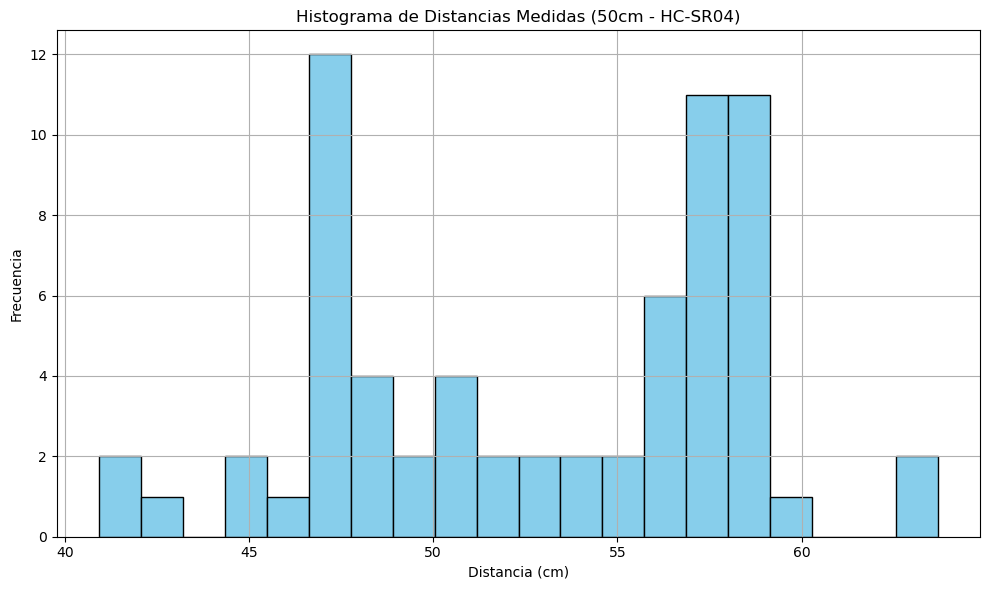

In [38]:
distances = data1["distance_cm"]
# Crear histograma
plt.figure(figsize=(10, 6))

distances_50cm = data1["distance_cm"]

# Crear el histograma
#######################
plt.hist(distances_50cm, bins=20, color='skyblue', edgecolor='black')
plt.title("Histograma de Distancias Medidas (50cm - HC-SR04)")
plt.xlabel("Distancia (cm)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/histograma_50cm.png', dpi=300, bbox_inches='tight')
plt.show()

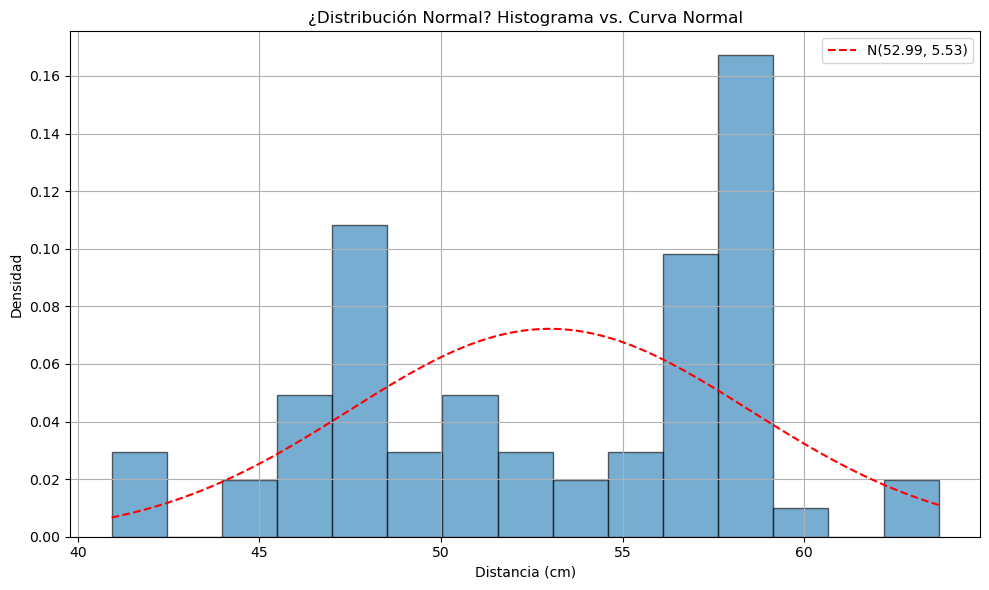

In [39]:
mean_50cm = distances_50cm.mean()
std_50cm = distances_50cm.std()

plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(distances_50cm, bins=15, density=True, alpha=0.6, edgecolor='black')

# Curva normal ajustada
x = np.linspace(min(distances_50cm), max(distances_50cm), 100)
plt.plot(x, norm.pdf(x, mean_50cm, std_50cm), 'r--', label=f'N({mean_50cm:.2f}, {std_50cm:.2f})')

plt.title("¿Distribución Normal? Histograma vs. Curva Normal")
plt.xlabel("Distancia (cm)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/distribucionnormal_50cm.png', dpi=300, bbox_inches='tight')
plt.show()

### Gráfica Q-Q (Quantile-Quantile)
Muestra si los cuantiles de tus datos se alinean con los de una distribución normal.
Si los puntos siguen la línea recta central tus datos se distribuyen normalmente.

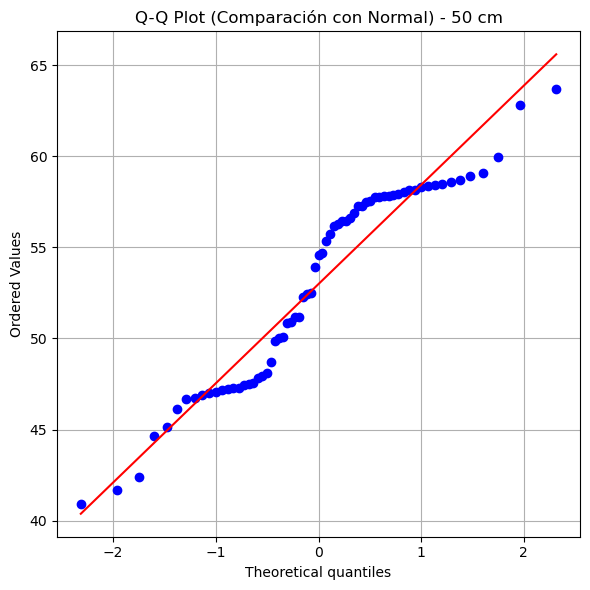

In [40]:
# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(distances_50cm, dist="norm", plot=plt)
plt.title("Q-Q Plot (Comparación con Normal) - 50 cm")
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/QQ_50cm.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Estadísticas para 50 cm
mean_50cm = distances_50cm.mean()
std_50cm = distances_50cm.std()
sem_50cm = std_50cm / (len(distances_50cm) ** 0.5)

print(f"Media (μ) 50 cm: {mean_50cm:.2f} cm")
print(f"Desviación estándar (σ) 50 cm: {std_50cm:.2f} cm")
print(f"Incertidumbre estándar (SEM) 50 cm: {sem_50cm:.2f} cm")

Media (μ) 50 cm: 52.99 cm
Desviación estándar (σ) 50 cm: 5.53 cm
Incertidumbre estándar (SEM) 50 cm: 0.68 cm


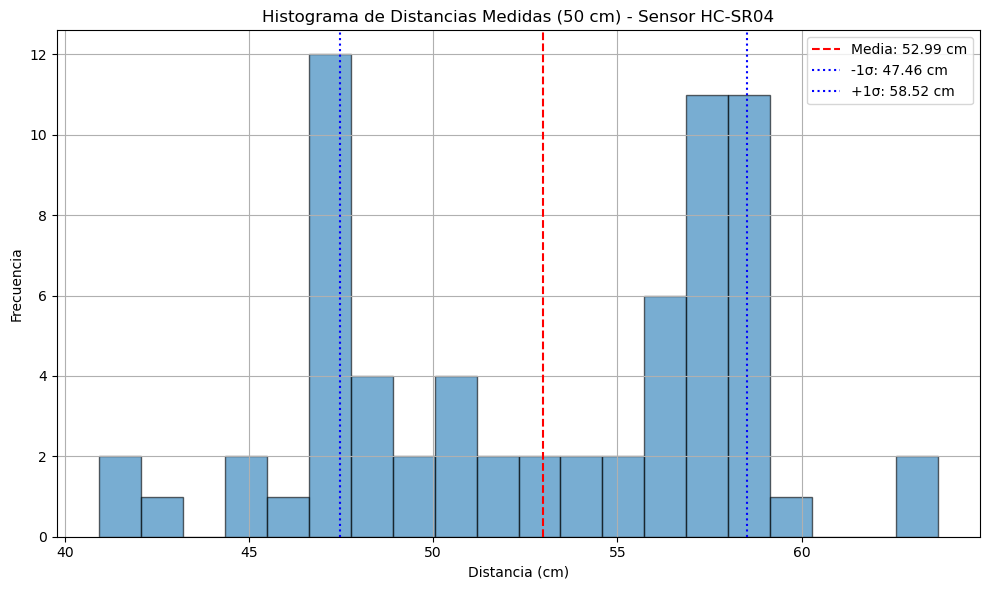

In [41]:
# Gráfico 50cm

plt.figure(figsize=(10, 6))
plt.hist(distances_50cm, bins=20, edgecolor='black', alpha=0.6)

# Líneas
plt.axvline(mean_50cm, color='red', linestyle='--', label=f'Media: {mean_50cm:.2f} cm')
plt.axvline(mean_50cm - std_50cm, color='blue', linestyle=':', label=f'-1σ: {mean_50cm - std_50cm:.2f} cm')
plt.axvline(mean_50cm + std_50cm, color='blue', linestyle=':', label=f'+1σ: {mean_50cm + std_50cm:.2f} cm')

# Estilo
plt.title("Histograma de Distancias Medidas (50 cm) - Sensor HC-SR04")
plt.xlabel("Distancia (cm)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/histogramamedia_50cm.png', dpi=300, bbox_inches='tight')
plt.show()

### Calculo del error

In [25]:
# Cálculo del error para 50 cm
true_distance_50cm = 50  # Valor real esperado
errors_50cm = distances_50cm - true_distance_50cm

mae_50cm = np.mean(errors_50cm)
std_error_50cm = np.std(errors_50cm, ddof=1)

print(f"Distancia real: {true_distance_50cm} cm")
print(f"Error medio absoluto (MAE): {mae_50cm:.3f} cm")
print(f"Desviación estándar del error: {std_error_50cm:.3f} cm")

Distancia real: 50 cm
Error medio absoluto (MAE): 2.990 cm
Desviación estándar del error: 5.526 cm


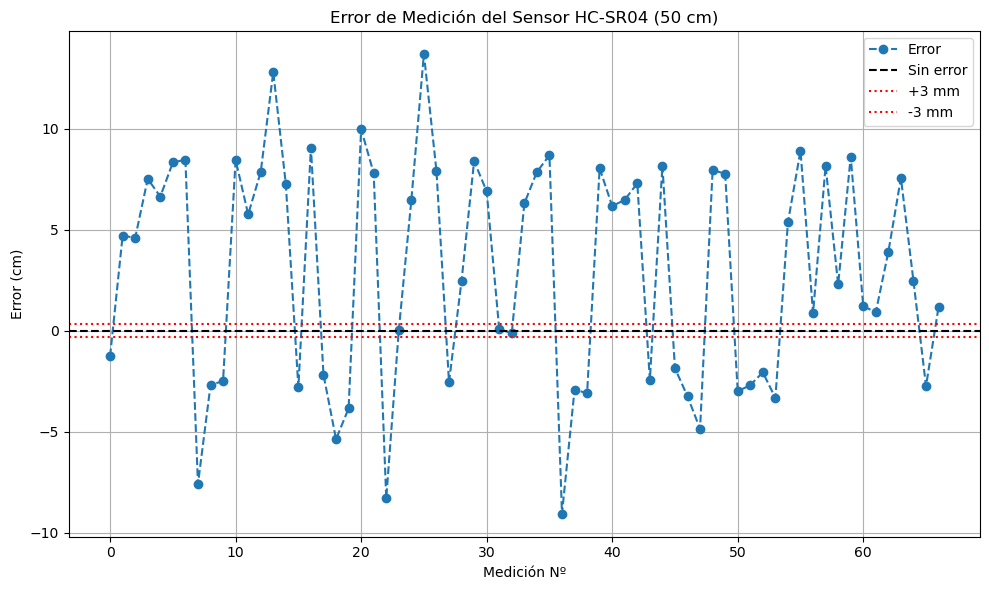

In [42]:
# Gráfica del error de medición para 50 cm
plt.figure(figsize=(10, 6))
plt.plot(errors_50cm.values, marker='o', linestyle='--', label="Error")
plt.axhline(0, color='black', linestyle='--', label="Sin error")
plt.axhline(0.3, color='red', linestyle=':', label="+3 mm")
plt.axhline(-0.3, color='red', linestyle=':', label="-3 mm")

plt.title("Error de Medición del Sensor HC-SR04 (50 cm)")
plt.xlabel("Medición Nº")
plt.ylabel("Error (cm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/error_50cm.png', dpi=300, bbox_inches='tight')
plt.show()

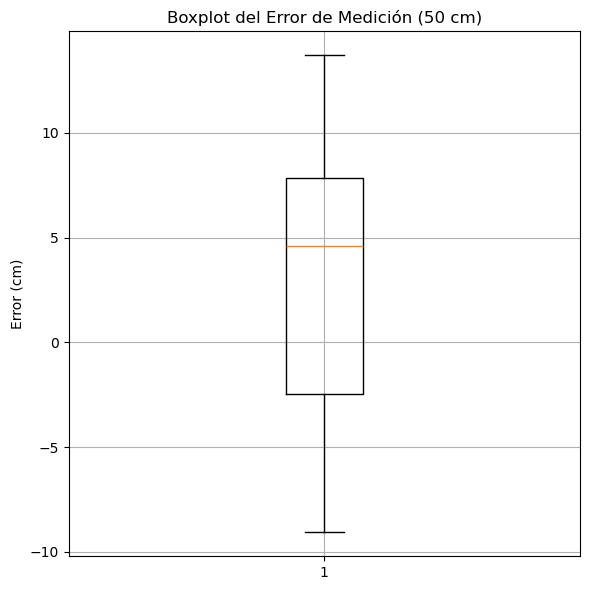

In [43]:
plt.figure(figsize=(6, 6))
plt.boxplot(errors_50cm, vert=True)
plt.title("Boxplot del Error de Medición (50 cm)")
plt.ylabel("Error (cm)")
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/boxplot_50cm.png', dpi=300, bbox_inches='tight')
plt.show()

## Intervalo de confianza

$$
\text{ME} = z \cdot \frac{\sigma}{\sqrt{n}}
$$

- ME es el margen de error.

- z es el valor crítico (por ejemplo, 1.96 para un 95% de confianza).

- σ es la desviación estándar muestral.

- n es el tamaño de la muestra.

In [33]:
# Intervalo de confianza para 50 cm

n_50cm = 67  # Tamaño de la muestra

z_95 = norm.ppf(0.975)  # Valor crítico para 95% de confianza

me_50cm = z_95 * (std_50cm / np.sqrt(n_50cm))  # Margen de error

ci_lower_50cm = mean_50cm - me_50cm
ci_upper_50cm = mean_50cm + me_50cm

print(f"Media (μ): {mean_50cm:.2f} cm")
print(f"Desviación estándar (σ): {std_50cm:.2f} cm")
print(f"Tamaño de muestra (n): {n_50cm}")
print(f"Margen de error (95%): {me_50cm:.2f} cm")
print(f"Intervalo de confianza al 95%: [{ci_lower_50cm:.2f} cm, {ci_upper_50cm:.2f} cm]")


Media (μ): 52.99 cm
Desviación estándar (σ): 5.53 cm
Tamaño de muestra (n): 67
Margen de error (95%): 1.32 cm
Intervalo de confianza al 95%: [51.67 cm, 54.31 cm]


# Resultados para 20cm

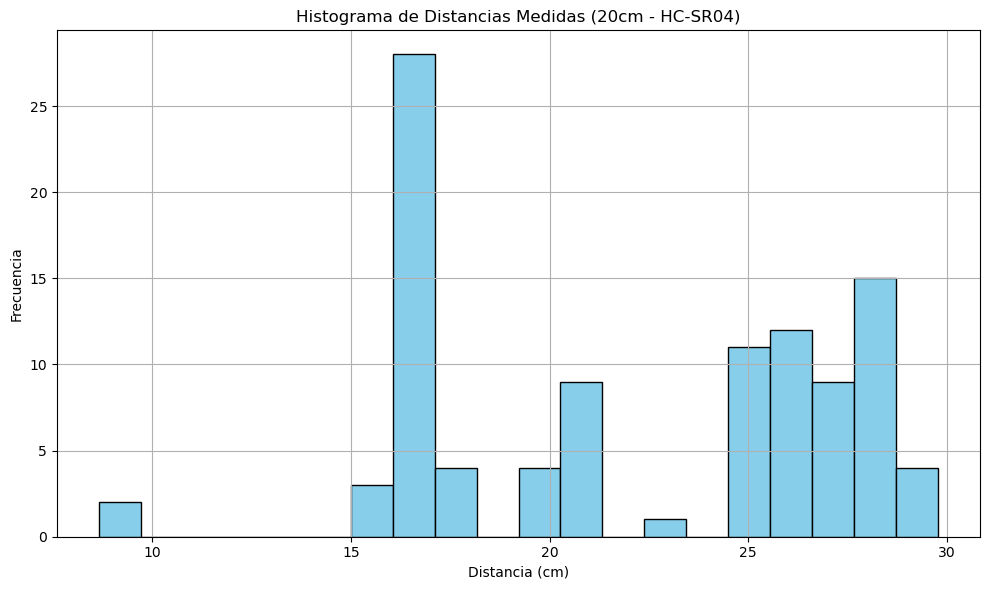

In [44]:
distances = data2["distance_cm"]
# Crear histograma
plt.figure(figsize=(10, 6))

distances_20cm = data2["distance_cm"]

# Crear el histograma
#######################
plt.hist(distances_20cm, bins=20, color='skyblue', edgecolor='black')
plt.title("Histograma de Distancias Medidas (20cm - HC-SR04)")
plt.xlabel("Distancia (cm)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/histograma_20cm.png', dpi=300, bbox_inches='tight')
plt.show()

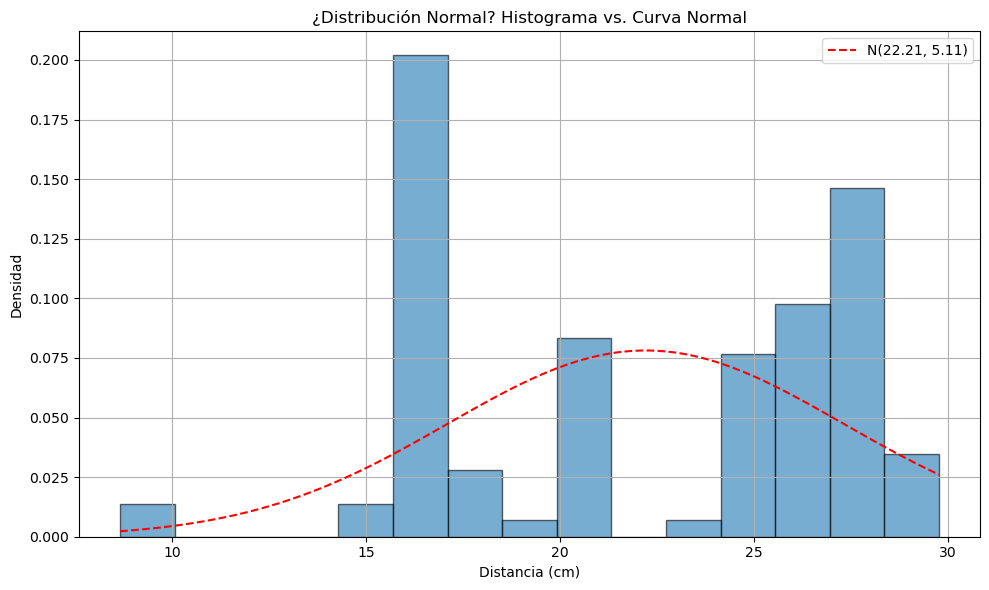

In [45]:
mean_20cm = distances_20cm.mean()
std_20cm = distances_20cm.std()

plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(distances_20cm, bins=15, density=True, alpha=0.6, edgecolor='black')

# Curva normal ajustada
x = np.linspace(min(distances_20cm), max(distances_20cm), 100)
plt.plot(x, norm.pdf(x, mean_20cm, std_20cm), 'r--', label=f'N({mean_20cm:.2f}, {std_20cm:.2f})')

plt.title("¿Distribución Normal? Histograma vs. Curva Normal")
plt.xlabel("Distancia (cm)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/distribucionnormal_20cm.png', dpi=300, bbox_inches='tight')
plt.show()

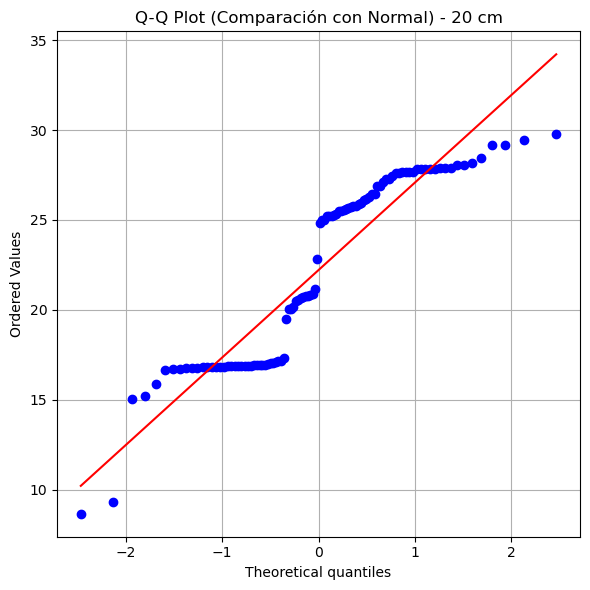

In [46]:
# Q-Q plot para la medición de 20 cm
plt.figure(figsize=(6, 6))
stats.probplot(distances_20cm, dist="norm", plot=plt)
plt.title("Q-Q Plot (Comparación con Normal) - 20 cm")
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/qq_20cm.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Estadísticas para 20 cm
mean_20cm = distances_20cm.mean()
std_20cm = distances_20cm.std()
sem_20cm = std_20cm / (len(distances_20cm) ** 0.5)

print(f"Media (μ) 20 cm: {mean_20cm:.2f} cm")
print(f"Desviación estándar (σ) 20 cm: {std_20cm:.2f} cm")
print(f"Incertidumbre estándar (SEM) 20 cm: {sem_20cm:.2f} cm")

Media (μ) 20 cm: 22.21 cm
Desviación estándar (σ) 20 cm: 5.11 cm
Incertidumbre estándar (SEM) 20 cm: 0.51 cm


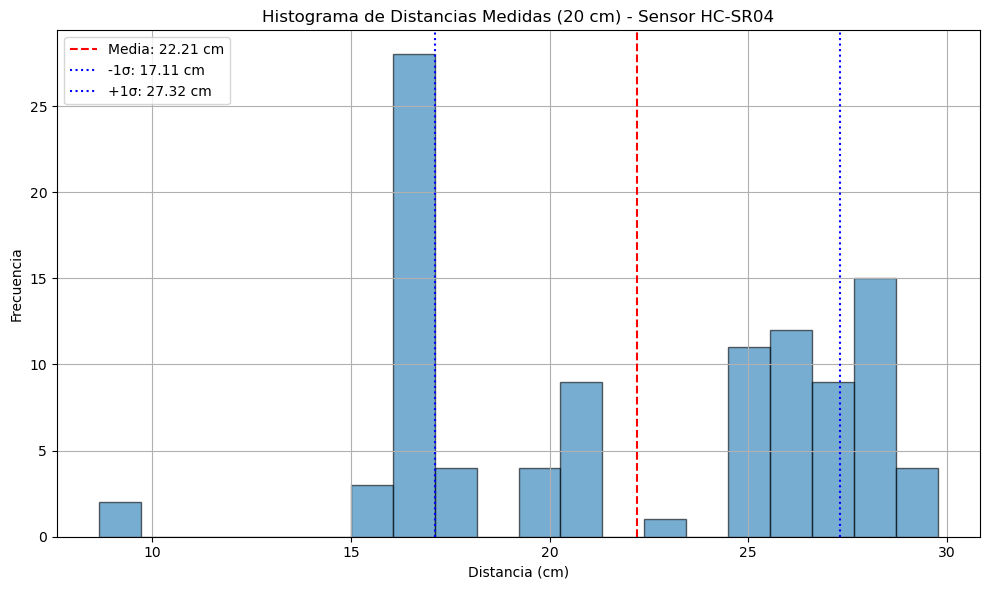

In [47]:
# Gráfico 20 cm

plt.figure(figsize=(10, 6))
plt.hist(distances_20cm, bins=20, edgecolor='black', alpha=0.6)

# Líneas
plt.axvline(mean_20cm, color='red', linestyle='--', label=f'Media: {mean_20cm:.2f} cm')
plt.axvline(mean_20cm - std_20cm, color='blue', linestyle=':', label=f'-1σ: {mean_20cm - std_20cm:.2f} cm')
plt.axvline(mean_20cm + std_20cm, color='blue', linestyle=':', label=f'+1σ: {mean_20cm + std_20cm:.2f} cm')

# Estilo
plt.title("Histograma de Distancias Medidas (20 cm) - Sensor HC-SR04")
plt.xlabel("Distancia (cm)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/histogramamedia_20cm.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
# Cálculo del error para 20 cm
true_distance_20cm = 20  # Valor real esperado
errors_20cm = distances_20cm - true_distance_20cm

mae_20cm = np.mean(errors_20cm)
std_error_20cm = np.std(errors_20cm, ddof=1)

print(f"Distancia real: {true_distance_20cm} cm")
print(f"Error medio absoluto (MAE): {mae_20cm:.3f} cm")
print(f"Desviación estándar del error: {std_error_20cm:.3f} cm")

Distancia real: 20 cm
Error medio absoluto (MAE): 2.213 cm
Desviación estándar del error: 5.106 cm


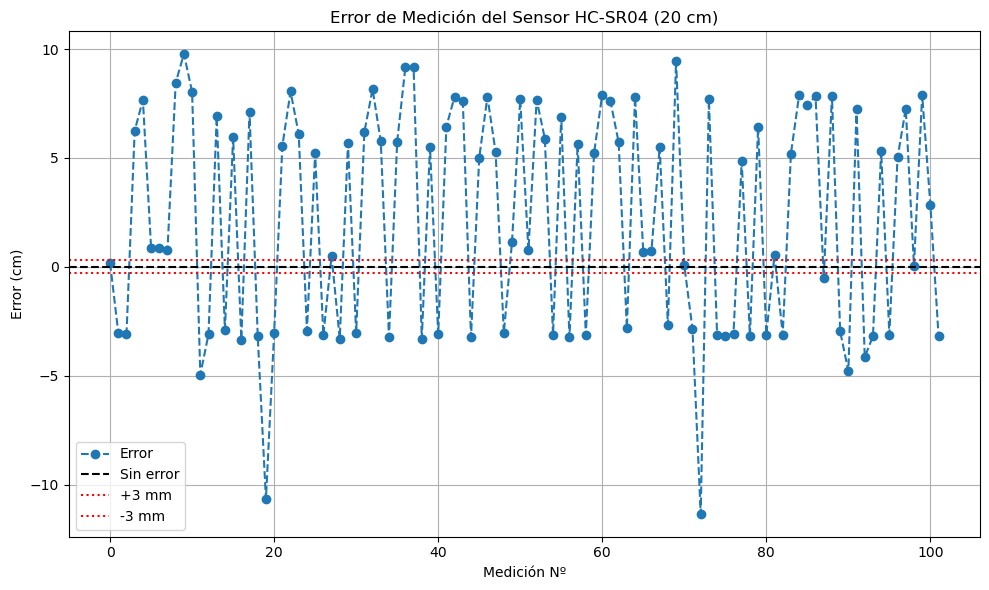

In [48]:
# Gráfica del error de medición para 20 cm
plt.figure(figsize=(10, 6))
plt.plot(errors_20cm.values, marker='o', linestyle='--', label="Error")
plt.axhline(0, color='black', linestyle='--', label="Sin error")
plt.axhline(0.3, color='red', linestyle=':', label="+3 mm")
plt.axhline(-0.3, color='red', linestyle=':', label="-3 mm")

plt.title("Error de Medición del Sensor HC-SR04 (20 cm)")
plt.xlabel("Medición Nº")
plt.ylabel("Error (cm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/error_20cm.png', dpi=300, bbox_inches='tight')
plt.show()

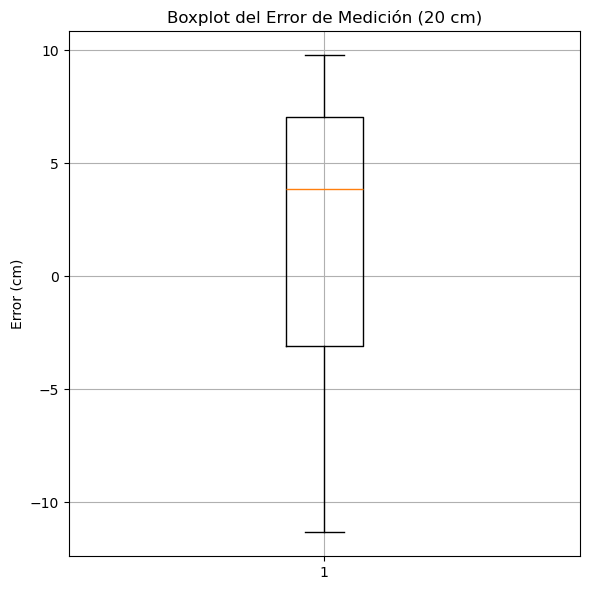

In [49]:
# Boxplot
plt.figure(figsize=(6, 6))
plt.boxplot(errors_20cm, vert=True)
plt.title("Boxplot del Error de Medición (20 cm)")
plt.ylabel("Error (cm)")
plt.grid(True)
plt.tight_layout()
plt.savefig('graficosp2/boxplot_20cm.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Intervalo de confianza para 20 cm
n_20cm = 102  # Tamaño de la muestra
z_95 = norm.ppf(0.975)  # Valor crítico para 95% de confianza
me_20cm = z_95 * (std_20cm / np.sqrt(n_20cm))  # Margen de error

ci_lower_20cm = mean_20cm - me_20cm
ci_upper_20cm = mean_20cm + me_20cm

print(f"Media (μ): {mean_20cm:.2f} cm")
print(f"Desviación estándar (σ): {std_20cm:.2f} cm")
print(f"Tamaño de muestra (n): {n_20cm}")
print(f"Margen de error (95%): {me_20cm:.2f} cm")
print(f"Intervalo de confianza al 95%: [{ci_lower_20cm:.2f} cm, {ci_upper_20cm:.2f} cm]")

Media (μ): 22.21 cm
Desviación estándar (σ): 5.11 cm
Tamaño de muestra (n): 102
Margen de error (95%): 0.99 cm
Intervalo de confianza al 95%: [21.22 cm, 23.20 cm]
